In [1]:
library(eurostat)

# Úlohy - kontingenční tabulky

Jako příklad si vezmeme data z Eurostatu s tímto názvem:

**Students enrolled in tertiary education by education level, programme orientation, sex and NUTS2 regions**

Identifikátor datasetu je *educ_uoe_enrt06*. Data jsou dostupná rovněž na https://ec.europa.eu/eurostat/databrowser/view/educ_uoe_enrt06/default/table?lang=EN

## Úkol 1

Stáhněte výše uvedená data a připravte je k analýze.

Zajímat nás budou data:
- NUTS CZ (celá ČR)
- nejnovější rok (2021-01-01)
- isced11 kódy
  - ED6 - Bachelor's or equivalent level
  - ED7 - Master's or equivalent level
  - ED8 - Doctoral or equivalent level
- pohlaví M/F

Vše ostatní vč. přebytečných hodnot (levelů) faktorových proměnných zahodíme (`droplevels()`). Výsledkem tedy nechť je tabulka obsahující pouze sloupce "*isced11*", "*sex*", "*values*".

*Pozn.: Pokud bychom si chtěli data prohlédnout detailně, můžeme si vyžádat "olabelování":*

```> label_eurostat(cz_data, fix_duplicated=T)```


In [14]:
data <- get_eurostat("educ_uoe_enrt06")
head(data)

Dataset query already saved in cache_list.json...

Reading cache file /tmp/RtmpjpXR8N/eurostat/672f15de76f2aa88becfd4567c915e52.rds

Table  educ_uoe_enrt06  read from cache file:  /tmp/RtmpjpXR8N/eurostat/672f15de76f2aa88becfd4567c915e52.rds



freq unit isced11 sex geo TIME_PERIOD values
1 A    NR   ED5     F   AT  2013-01-01  41240 
2 A    NR   ED5     F   AT  2014-01-01  41624 
3 A    NR   ED5     F   AT  2015-01-01  41849 
4 A    NR   ED5     F   AT  2016-01-01  41271 
5 A    NR   ED5     F   AT  2017-01-01  40562 
6 A    NR   ED5     F   AT  2018-01-01  40188

In [15]:
cz_data <- data[data$geo=='CZ',]
cz_data <- cz_data[cz_data$TIME_PERIOD=='2021-01-01',]
cz_data$sex <- factor(cz_data$sex)
cz_data$isced11 <- factor(cz_data$isced11)
cz_data <- cz_data[cz_data$isced11 %in% c('ED6', 'ED7', 'ED8'),]
cz_data <- cz_data[cz_data$sex %in% c('F', 'M'),]
cz_data <- droplevels(cz_data)
cz_data$unit = NULL
cz_data$geo = NULL
cz_data$time = NULL

In [16]:
cz_data

freq isced11 sex TIME_PERIOD values
1 A    ED6     F   2021-01-01  111772
2 A    ED6     M   2021-01-01   86929
3 A    ED7     F   2021-01-01   64509
4 A    ED7     M   2021-01-01   42725
5 A    ED8     F   2021-01-01    9645
6 A    ED8     M   2021-01-01   12202

### Úkol 2

Nyní vytvoříme kontingenční tabulku. Jelikož má vzniknout z výše připravené tabulky, bude potřeba ji vytvořit pomocí vhodné funkce. Tou je `xtabs()`. Současně se poprvé setkáme s argumentem `formula`, který říká, jakým způsobem jsou zkoumaná data vysvětlována.

V našem případě má hodnoty `values` vysvětlovat kombinace `sex` - `isced11`. Použijeme tedy `formula = values ~ sex + isced11`. Do vzniklé tabulky doplňte marginální součty pomocí `addmargins()`.

In [17]:
ct <- xtabs(formula=values ~ sex + isced11, data=cz_data)
ct

   isced11
sex    ED6    ED7    ED8
  F 111772  64509   9645
  M  86929  42725  12202

In [18]:
addmargins(ct)

isced11
sex   ED6    ED7    ED8   Sum   
  F   111772  64509  9645 185926
  M    86929  42725 12202 141856
  Sum 198701 107234 21847 327782

### Úkol 3

Prozkoumejte pravděpodobnosti jednotlivých buněk tabulky. Doplňte rovněž marginální pravděpodobnosti. Nápověda: `prop.table()`, `addmargins()`.

In [19]:
addmargins(prop.table(ct))

isced11
sex   ED6       ED7       ED8        Sum      
  F   0.3409949 0.1968046 0.02942504 0.5672246
  M   0.2652037 0.1303458 0.03722596 0.4327754
  Sum 0.6061986 0.3271504 0.06665101 1.0000000

### Úkol 4

Použijte `mosaicplot()` a interpretujte obrázek v duchu výše uvedených výsledků.

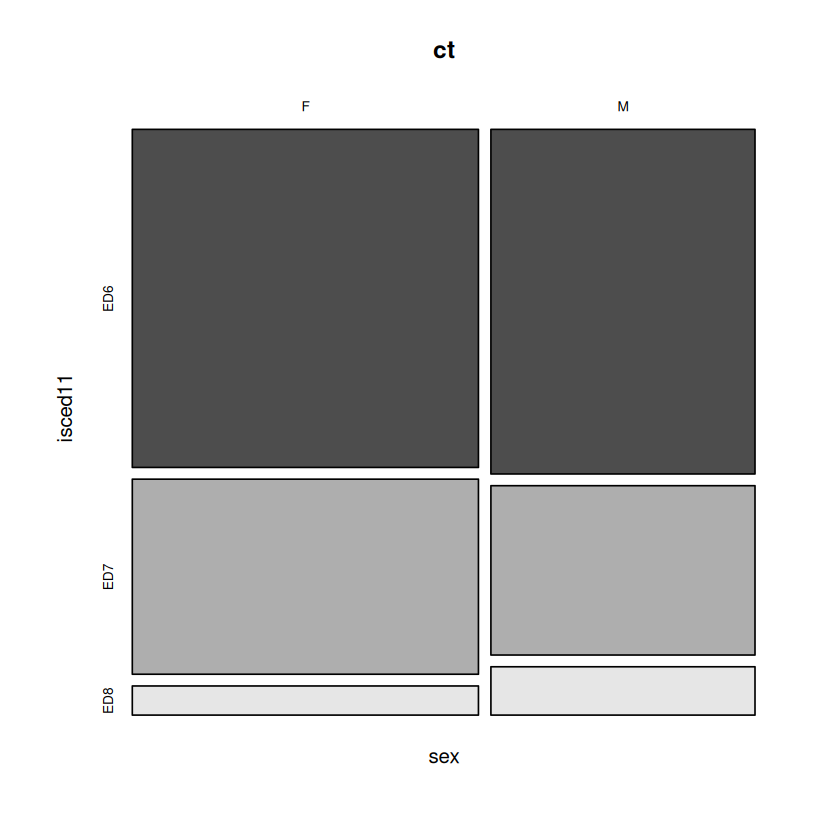

In [20]:
mosaicplot(ct, color=T)

### Úkol 5

Proveďte $\chi^2$ test nezávislosti mezi znaky "pohlaví" a "počet studentů". Zapište hypotézy a test vyhodnoťte. Zjistěte očekávané hodnoty počtů za podmínky platnosti nulové hypotézy a porovnejte je s hodnotami pozorovanými.

In [21]:
pears <- chisq.test(ct)
pears


	Pearson's Chi-squared test

data:  ct
X-squared = 1940.5, df = 2, p-value < 2.2e-16


In [22]:
addmargins(pears$expected)

isced11
sex   ED6       ED7       ED8       Sum   
  F   112708.09  60825.76 12392.155 185926
  M    85992.91  46408.24  9454.845 141856
  Sum 198701.00 107234.00 21847.000 327782

In [23]:
addmargins(pears$expected - pears$observed)

isced11
sex   ED6       ED7       ED8       Sum          
  F    936.0869 -3683.242  2747.155  3.637979e-12
  M   -936.0869  3683.242 -2747.155 -3.637979e-12
  Sum    0.0000     0.000     0.000  0.000000e+00

### Úkol 6

Pouze cvičně zkuste spočíst Cramérovo V. Byť to v dané aplikaci není užitečné, interpretujte hodnotu a vysvětlete, za jakých podmínek by byla 1. Použijte např. `CramerV()` z balíčku `DescTools`.

In [24]:
library(DescTools)

In [25]:
CramerV(ct)

[1] 0.07694268

In [26]:
ct[1,3] <- 0
ct[2,1] <- 0
ct[2,2] <- 0
ct

   isced11
sex    ED6    ED7    ED8
  F 111772  64509      0
  M      0      0  12202

In [27]:
CramerV(ct)

[1] 1